In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\devsa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\devsa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\devsa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\devsa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


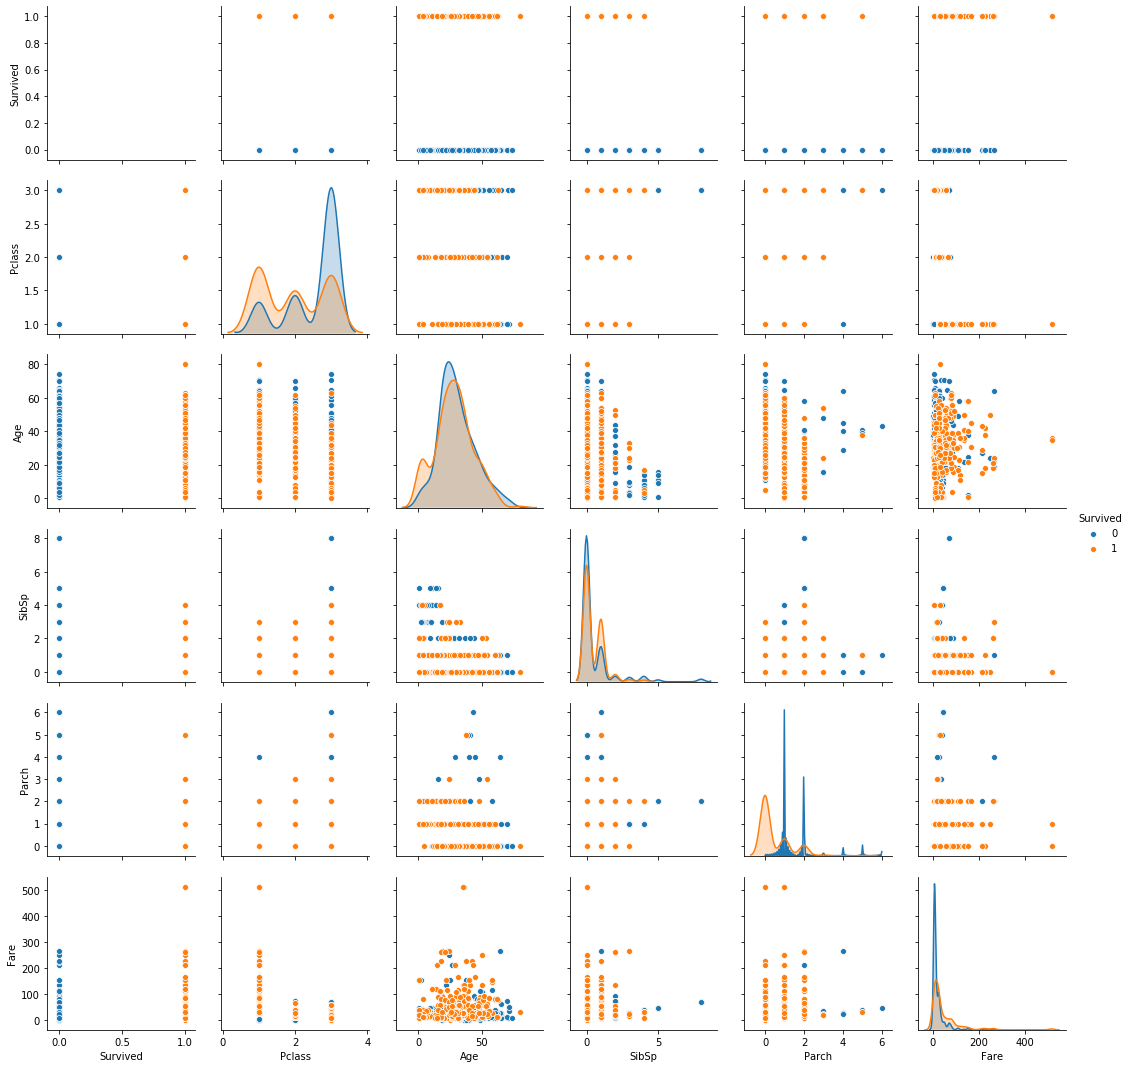

In [0]:
sns.pairplot(train.drop(['PassengerId','Name','Ticket'],axis=1),hue = 'Survived')

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
train.drop(['PassengerId','Ticket'],axis=1,inplace = True)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


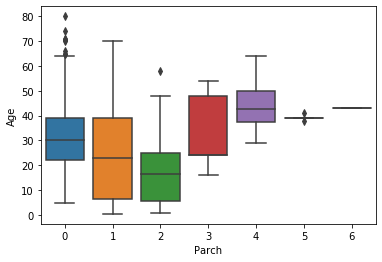

In [0]:
sns.boxplot(x = 'Parch',y='Age',data=train)

In [0]:
train.groupby('Parch').mean()['Age']

Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [0]:
def age_class(df):
    age = df[1]
    parch = df[0]
    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        elif parch == 5:
            return 39
        elif parch == 6:
            return 43
        else:
            return 30
    else:
        return age

In [0]:
train['Age'] = train[['Parch','Age']].apply(age_class,axis=1)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

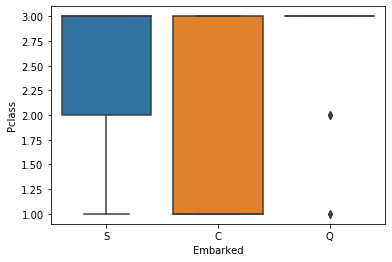

In [0]:
sns.boxplot(x = 'Embarked',y='Pclass',data=train)

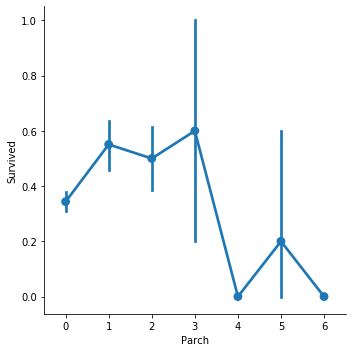

In [0]:
sns.catplot(x='Parch',y='Survived',data=train,kind='point')

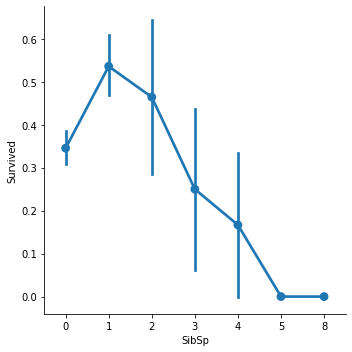

In [0]:
sns.catplot(x='SibSp',y='Survived',data=train,kind='point')

In [0]:
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp','Parch'],axis=1,inplace=True)
train.tail()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,NaN,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,23.45,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,C148,C,0
890,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,NaN,Q,0


In [0]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
data = [train, test]
for dataset in data:
    dataset['Deck'] = dataset['Cabin'].fillna("U")
    dataset['Deck'] = dataset['Cabin'].astype(str).str[0] 
    dataset['Deck'] = dataset['Deck'].str.capitalize()
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [0]:
for dataset in data:
    dataset.drop(['Cabin'],axis=1,inplace=True)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,0


In [0]:
train['Fare_Per_Person'] = train['Fare']/(train['Family']+1)
train['Fare_Per_Person'] = train['Fare_Per_Person'].astype(int)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Deck,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,3,35
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,0,7
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,3,26
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,0,8


In [0]:
train.drop(['Fare'],axis=1,inplace=True)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,Embarked,Family,Deck,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,1,0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,1,3,35
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,0,0,7
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,1,3,26
4,0,3,"Allen, Mr. William Henry",male,35.0,S,0,0,8


In [0]:
train.isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
Embarked           2
Family             0
Deck               0
Fare_Per_Person    0
dtype: int64

In [0]:
train.drop(['Pclass'],axis=1,inplace=True)

In [0]:
embarked = {"S":0,"C":1,"Q":2}
sex = {'male':0,'female':1}
train['Embarked'] = train['Embarked'].map(embarked)
train['Sex'] = train['Sex'].map(sex)
train.head()

,Survived,Name,Sex,Age,Embarked,Family,Deck,Fare_Per_Person
0,0,"Braund, Mr. Owen Harris",0,22.0,0.0,1,0,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,1,3,35
2,1,"Heikkinen, Miss. Laina",1,26.0,0.0,0,0,7
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0.0,1,3,26
4,0,"Allen, Mr. William Henry",0,35.0,0.0,0,0,8


In [0]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [0]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [0]:
title_dict = {
    'Capt':'Officer',
    'Col' : 'Officer',
    'Don': 'Royalty',
    'Dr':'Officer',
    'Jonkheer':'Royalty',
    'Lady':'Royalty',
    'Major':'Officer',
    'Master':'Master',
    'Miss':'Miss',
    'Mlle':'Miss',
    'Mme':'Mrs',
    'Mr':'Mr',
    'Mrs':'Mrs',
    'Ms':'Miss',
    'Rev':'Reverand',
    'Sir':'Royalty',
    'the Countess':'Royalty'
}
    
train['Title'] = train['Name'].map(lambda name : name.split(',')[1].split('.')[0].strip())
train['Title'] = train['Title'].map(title_dict)
    


In [0]:
train.drop('Name',axis=1,inplace=True)
train.head()


,Survived,Sex,Age,Embarked,Family,Deck,Fare_Per_Person,Title
0,0,0,22.0,0.0,1,0,3,Mr
1,1,1,38.0,1.0,1,3,35,Mrs
2,1,1,26.0,0.0,0,0,7,Miss
3,1,1,35.0,0.0,1,3,26,Mrs
4,0,0,35.0,0.0,0,0,8,Mr


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived           889 non-null int64
Sex                889 non-null int64
Age                889 non-null float64
Embarked           889 non-null float64
Family             889 non-null int64
Deck               889 non-null int32
Fare_Per_Person    889 non-null int32
Title              889 non-null object
dtypes: float64(2), int32(2), int64(3), object(1)
memory usage: 55.6+ KB


In [0]:
titles = pd.get_dummies(train['Title'],prefix = 'Name')
train = pd.concat([train,titles],axis=1)
train.drop('Title',axis=1,inplace=True)
train.head()

,Survived,Sex,Age,Embarked,Family,Deck,Fare_Per_Person,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Officer,Name_Reverand,Name_Royalty
0,0,0,22.0,0.0,1,0,3,0,0,1,0,0,0,0
1,1,1,38.0,1.0,1,3,35,0,0,0,1,0,0,0
2,1,1,26.0,0.0,0,0,7,0,1,0,0,0,0,0
3,1,1,35.0,0.0,1,3,26,0,0,0,1,0,0,0
4,0,0,35.0,0.0,0,0,8,0,0,1,0,0,0,0


In [0]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
print(accuracy_score(rfc.predict(X_train),y_train))
print(accuracy_score(rfc.predict(X_val),y_val))

0.8931082981715893
0.7921348314606742
